# Crafting a Data Story: Starbucks Calorie Information #

Using calorie data of Starbucks drink menu items to craft a data story that will illuminate the following:

- The data questions I asked
- The trends I investigated
- The visualizations I developed
- The conclusions I came to

In [13]:
# Loading python packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading Data ##

All nutritional information reflects a 12 oz. serving size. Data retrieved from [Kaggle](https://www.kaggle.com/starbucks/starbucks-menu).

In [2]:
# Loading data with NaN values coded
df_raw = pd.read_csv('data/starbucks-menu-nutrition-drinks.csv', na_values=['-'])
df_raw.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45.0,0.0,11.0,0.0,0.0,10.0
1,Ombré Pink Drink,NaN,NaN,NaN,NaN,NaN,NaN
2,Pink Drink,NaN,NaN,NaN,NaN,NaN,NaN
3,Strawberry Acai Starbucks Refreshers™ Beverage,80.0,0.0,18.0,1.0,0.0,10.0
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60.0,0.0,14.0,1.0,0.0,10.0


In [3]:
# Cleaning data via adding a new name for that first column
df_raw.rename({'Unnamed: 0': 'DrinkName'}, axis = 1, inplace = True)
df_raw.columns

Index(['DrinkName', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein',
       'Sodium'],
      dtype='object')

In [4]:
# Looking into NaN
df_raw.isna().sum()

DrinkName     0
Calories     85
Fat (g)      85
Carb. (g)    85
Fiber (g)    85
Protein      85
Sodium       85
dtype: int64

Because all of the columns have the same _NaN_ totals, this means that entire rows are filled with them. For the purposes of this exercise/notebook, I'll be dropping those rows.

In [5]:
df = df_raw.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 173
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DrinkName  92 non-null     object 
 1   Calories   92 non-null     float64
 2   Fat (g)    92 non-null     float64
 3   Carb. (g)  92 non-null     float64
 4   Fiber (g)  92 non-null     float64
 5   Protein    92 non-null     float64
 6   Sodium     92 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.8+ KB


## Data Exploration ##

Asking of the data:

- What does the distribution of Calories, Fat, Carbohydrates, Fiber, Protein & Sodium look like?
  - This is to see if there're any interesting (alarming?) values.

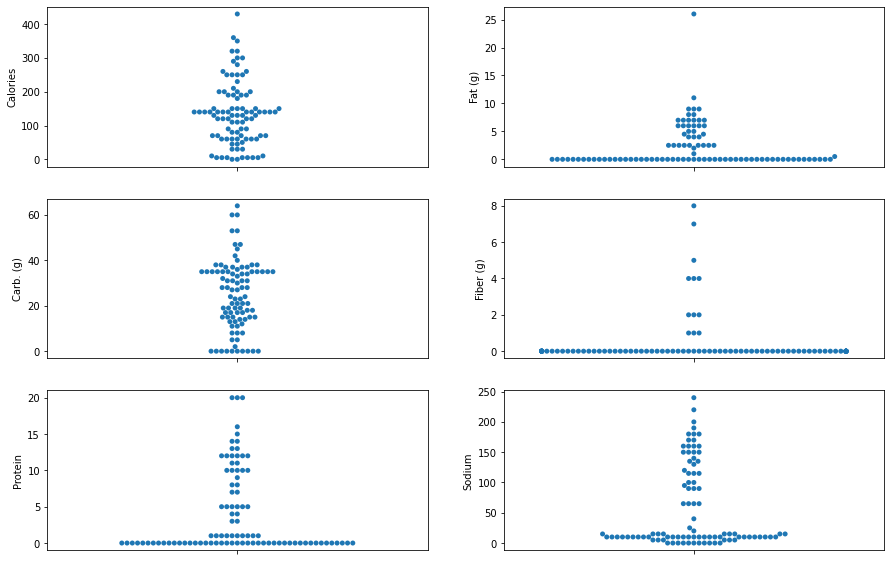

In [36]:
fig = plt.figure(figsize = (15,10))

for column in range(1, len(df.columns)):
    plt.subplot(3,2,column)
    sns.swarmplot(y = df[df.columns[column]])

From the swarm plots it looks like a lot fo the drinks don't have very many grams of fat (**nearly all** are under 10g). This implies that the calories in the drinks are driven by the carbohydrates, which are really just sugar.